In [67]:
import pandas as pd
from sklearn import preprocessing, decomposition, tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from IPython.display import SVG
import pydotplus
from graphviz import Source
import seaborn as sns
import matplotlib.pyplot as plt
from id3 import Id3Estimator, export_graphviz
%matplotlib inline

In [2]:
df_train = pd.read_csv(r"titanic\train.csv")
df_test = pd.read_csv(r"titanic\test.csv")

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
# changing object to category 

for i in df_train.columns:
    if df_train[i].dtype == 'object':
        df_train[i] = df_train[i].astype('category')   

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null category
Sex            891 non-null category
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null category
Fare           891 non-null float64
Cabin          204 non-null category
Embarked       889 non-null category
dtypes: category(5), float64(2), int64(5)
memory usage: 134.4 KB


In [6]:
## dropping duplicates
dup = df_train[df_train.duplicated()]
df_train.drop_duplicates()
dup.shape

(0, 12)

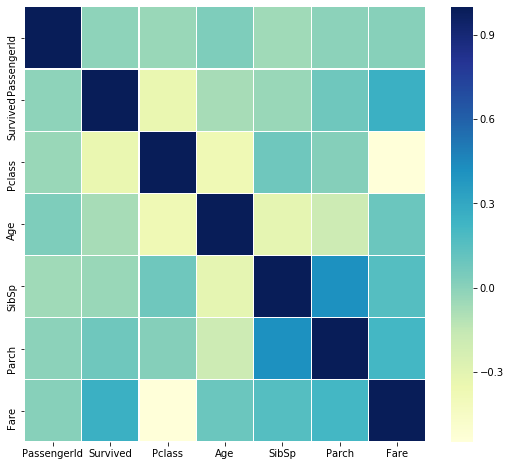

In [7]:
### Showing the correlation
corrmat = df_train.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [8]:
# feature for predictor variable
x = df_train.drop(['Survived'], axis=1)
y = df_train['Survived']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


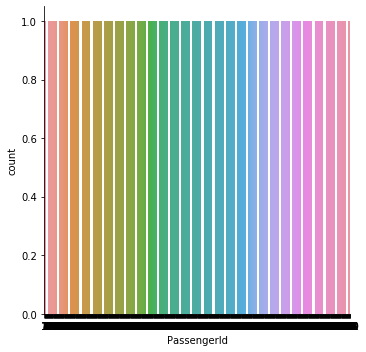

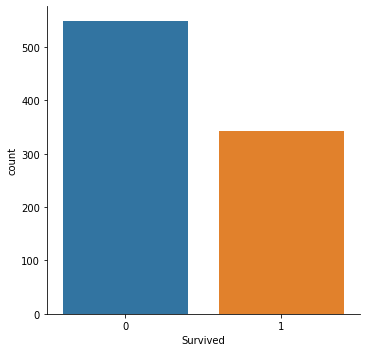

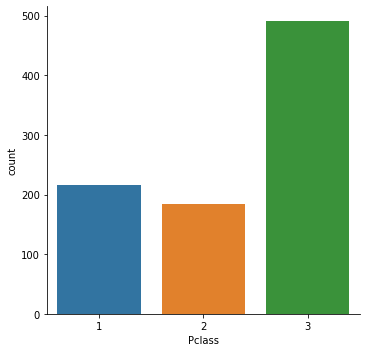

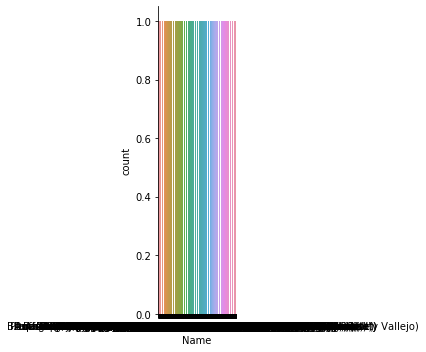

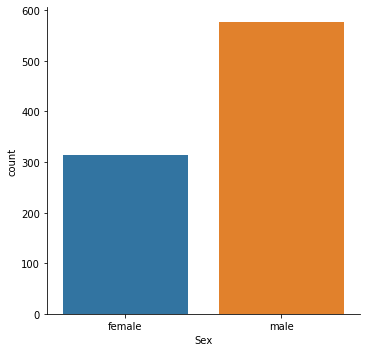

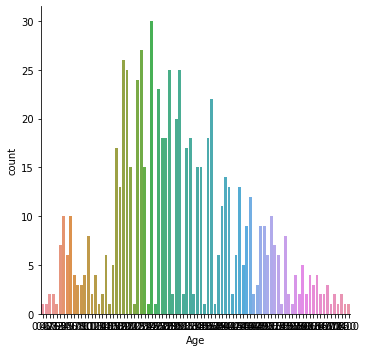

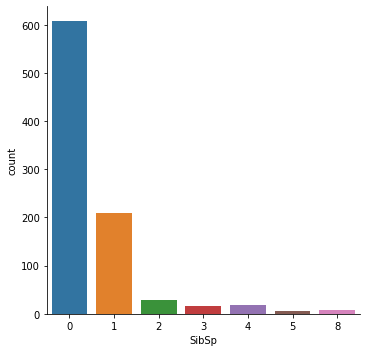

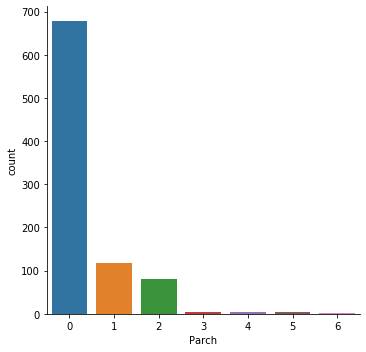

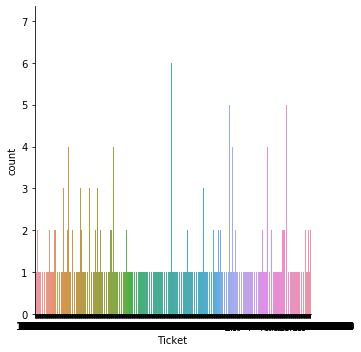

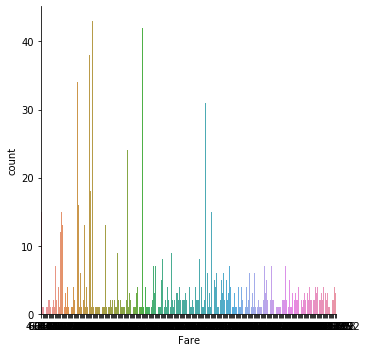

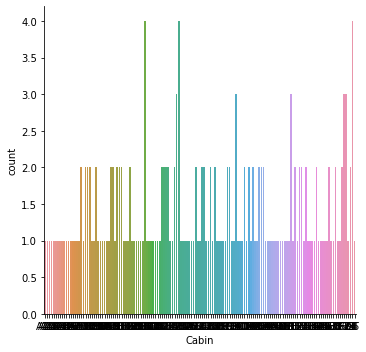

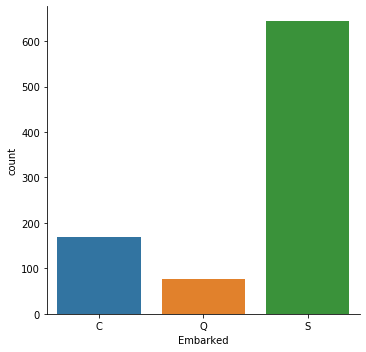

In [9]:
#### Plotting all the feautes
features = list(df_train.head(0))
for i in features:
    if df_train[i].astype != 'category':
        sns.factorplot(i,data=df_train,kind='count')

In [9]:
x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data preprocessing

In [10]:
# checking null values for preprcessing
pd.isna(x).sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
## filling age with mode
m_age = x['Age'].mode()
m_age.values.reshape(1,1)
x['Age'].fillna(m_age[0], inplace=True)
pd.isna(x['Age']).value_counts()

False    891
Name: Age, dtype: int64

In [12]:
## filling cabin with mode
m_cabin = x['Cabin'].mode()
x['Cabin'].fillna(m_cabin[0], inplace=True)
pd.isna(x['Cabin']).value_counts()

False    891
Name: Cabin, dtype: int64

In [13]:
## filling Embarked with mode
m_Embarked = x['Embarked'].mode()
x['Embarked'].fillna(m_Embarked[0], inplace=True)
pd.isna(x['Embarked']).value_counts()

False    891
Name: Embarked, dtype: int64

In [14]:
# sex and embarked is categorical in nature so we need to encode it  in dummies
features = list(x.head(0))
for i in features:   
    if x[i].dtype.name == "category":
        x[i] = pd.get_dummies(x[i])

In [15]:
#Scaling
x_s = preprocessing.scale(x)
y_s = preprocessing.scale(y)

In [16]:
le = preprocessing.LabelEncoder()
y_s = le.fit_transform(y_s)


PCA

In [76]:
### PCA, feature reduction
pca = PCA(n_components = 5)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3','principal component 4', 'principal component 5' ])

In [77]:
# Showing new principle components
principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,445.073584,-23.993303,-5.017232,0.186179,-0.481254
1,443.880920,40.514916,9.039914,0.092385,-0.565695
2,443.064258,-23.203366,-1.027438,-0.554440,0.152831
3,441.932721,22.242244,6.595871,0.139541,-0.557095
4,441.047099,-22.810313,7.960104,-0.373213,0.003654


In [78]:
### Putting this value as our new features

In [79]:
# splitting the train dataset
x_train, x_test, y_train, y_test = train_test_split(principalDf, y, test_size=.25, random_state=4)

# ID3 implementation

In [80]:
## create the model, ID3 algorithm
estimator = Id3Estimator()
estimator.fit(x_train, y_train)

Id3Estimator(gain_ratio=False, is_repeating=False, max_depth=None,
             min_entropy_decrease=0.0, min_samples_split=2, prune=False)

In [81]:
export_graphviz(estimator.tree_, 'tree.dot', ['principal component 1', 'principal component 2', 'principal component 3','principal component 4', 'principal component 5' ])

<_io.TextIOWrapper name='tree.dot' mode='w' encoding='utf8'>

In [82]:
# predicting on test features
y_pred = estimator.predict(x_test)

In [83]:
## checking accuracy
acc_id3 = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [84]:
acc_id3

0.7130044843049327

In [85]:
cm

array([[125,  25],
       [ 39,  34]], dtype=int64)

# CART Algorithm

In [86]:
#### For CART algorithm by scikit-learn

In [87]:
# creating a CART model
cart = tree.DecisionTreeClassifier(criterion='gini')
cart.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Tree visualization

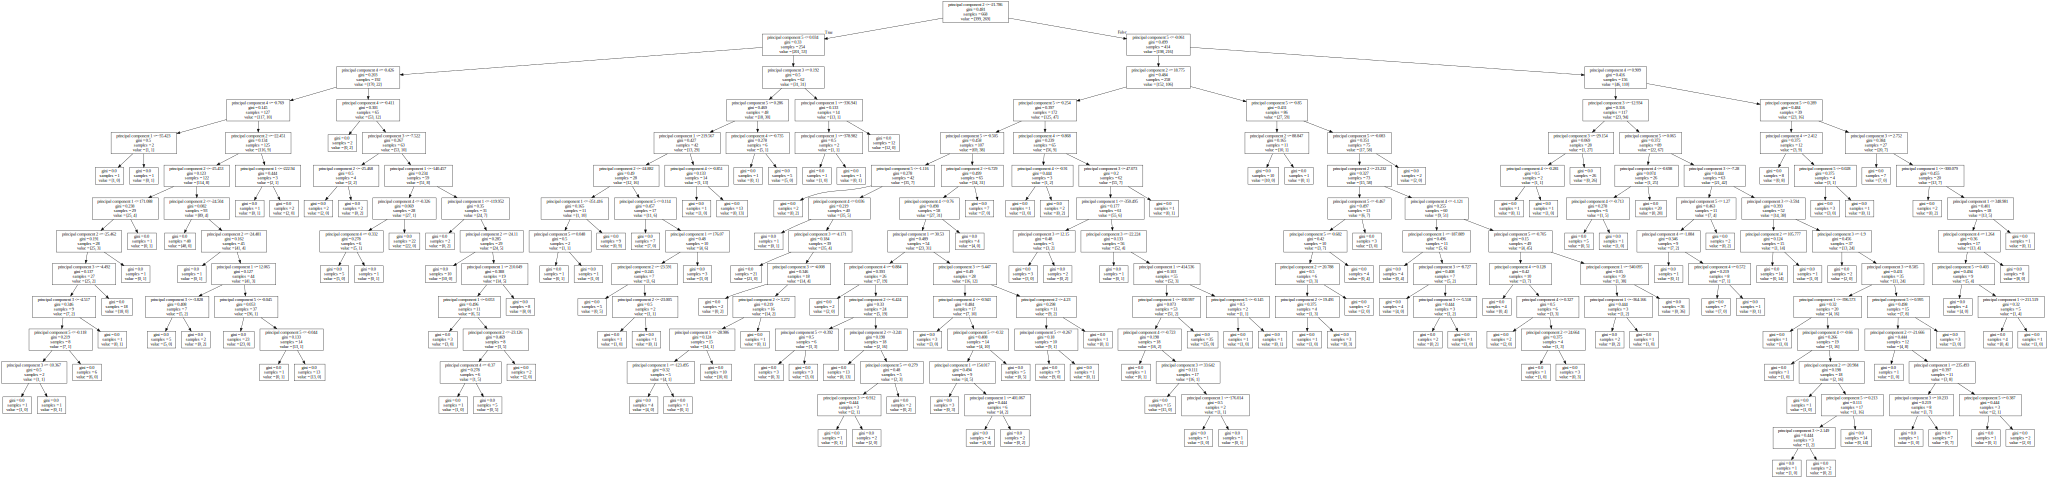

In [32]:
# showing the tree, here we can visualize the graph
graph = Source( tree.export_graphviz(cart, out_file=None, feature_names=['principal component 1', 'principal component 2', 'principal component 3','principal component 4', 'principal component 5' ]))
SVG(graph.pipe(format='svg'))

In [88]:
# predicting result on test data
y_pred_c = cart.predict(x_test)

In [89]:
# accuracy
acc_cart = accuracy_score(y_test, y_pred_c)
cm = confusion_matrix(y_test, y_pred_c)

In [90]:
# accuracy of CART
print(acc_cart)

0.7174887892376681


In [91]:
cm

array([[113,  37],
       [ 26,  47]], dtype=int64)

# C 4.5

In [92]:
#### C4.5 model from geerk
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [93]:
# predicting score
y_pred = clf.predict(x_test)

In [94]:
# model evaluation
acc_c45 = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [95]:
acc_c45

0.7399103139013453

In [96]:
cm

array([[114,  36],
       [ 22,  51]], dtype=int64)

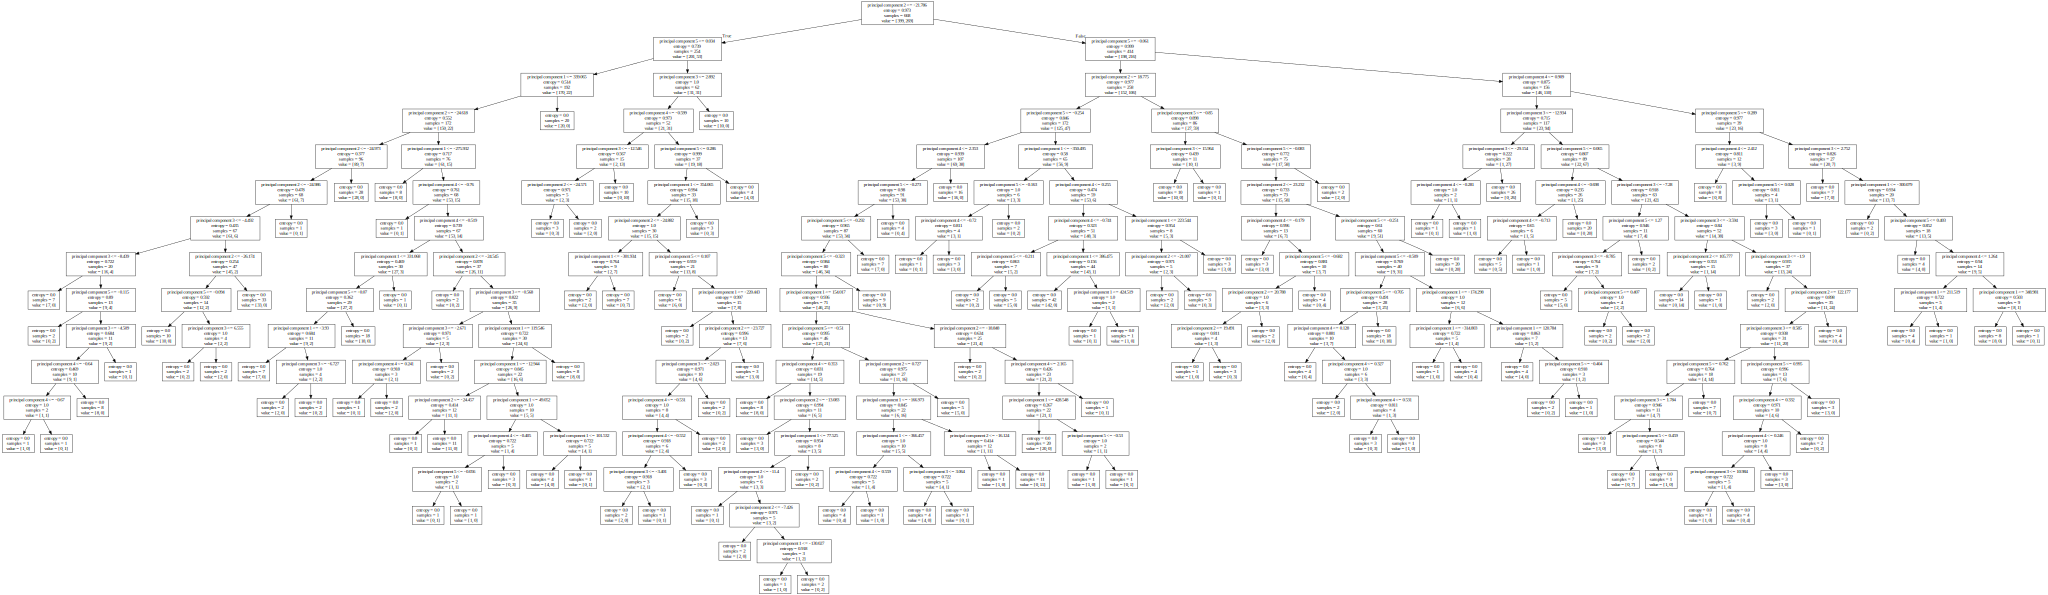

In [65]:
# showing the tree, here we can visualize the graph
graph = Source( tree.export_graphviz(clf, out_file=None, feature_names=['principal component 1', 'principal component 2', 'principal component 3','principal component 4', 'principal component 5' ]))
SVG(graph.pipe(format='svg'))

Comparing models

In [97]:
if acc_id3 > acc_cart:
    if acc_id3 > acc_c45:
        print("The Id3 performs best here")
    else:
        print("C4.5 performs best here")
        
else:
    if acc_cart > acc_c45:
        print("Cart performs the best")
    else:
        print("C4.5 performs best here")

C4.5 performs best here
